## Transfer Learning VGG 16 and VGG 19 using Keras

In [2]:
# import the libraries as shown below
from tensorflow import keras 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Please download the dataset from the below url

https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'D:/projectBE/chest_xray/train'
valid_path = 'D:/projectBE/chest_xray/val'


In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [5]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('D:/projectBE/chest_xray/train/*')

In [7]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('D:/projectBE/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 16709 images belonging to 6 classes.


In [13]:
test_set = test_datagen.flow_from_directory('D:/projectBE/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 2007 images belonging to 6 classes.


In [14]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/5
523/523 [==============================] - 2223s 4s/step - loss: 0.8381 - accuracy: 0.6890 - val_loss: 0.9010 - val_accuracy: 0.6911
Epoch 2/5
523/523 [==============================] - 2179s 4s/step - loss: 0.6514 - accuracy: 0.7546 - val_loss: 0.6327 - val_accuracy: 0.7559
Epoch 3/5
523/523 [==============================] - 2176s 4s/step - loss: 0.6211 - accuracy: 0.7714 - val_loss: 1.4397 - val_accuracy: 0.6702
Epoch 4/5
523/523 [==============================] - 2191s 4s/step - loss: 0.5845 - accuracy: 0.7838 - val_loss: 1.1015 - val_accuracy: 0.6986
Epoch 5/5
523/523 [==============================] - 2191s 4s/step - loss: 0.5434 - accuracy: 0.7980 - val_loss: 1.1615 - val_accuracy: 0.6851


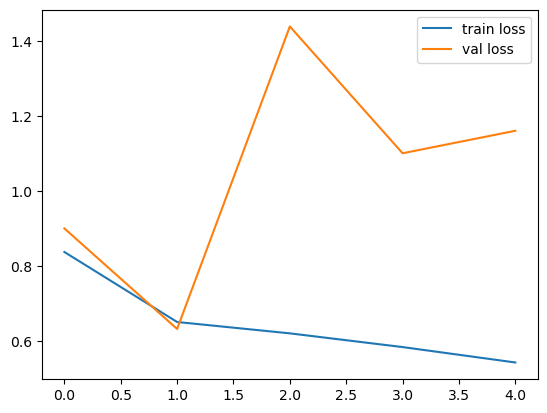

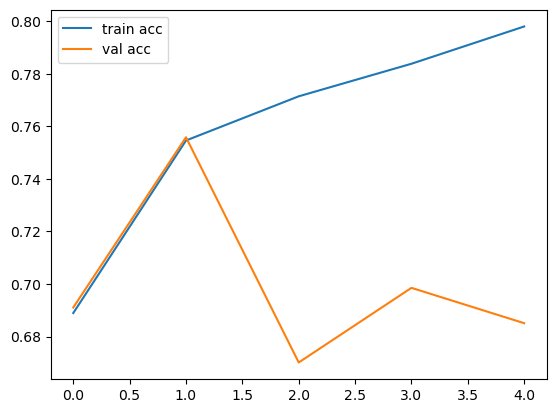

<Figure size 640x480 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [16]:
# save it as a h5 file

import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16new.h5')

In [17]:
# Similary you can use the same template for Vgg 19, Resnet50, Mobilenet. All you have to import the library. Below are the examples

from keras.applications.vgg19 import VGG19
from keras.applications.inception_v3 import InceptionV3



